**Proyecto Equipo D**
*    Alexia García Mayor
*    Eric David Acosta Rueda
*    Jose Antonio Diaz Medina
*    Rosalía María Reino Cancela

![An image](https://media.timtul.com/media/users/hackaboss_300_20211202185733.png)

**Proyecto II Grupo D** del curso de Ciencia de Datos de Hack'a'Boss **01 Julio 2024** (DSB10RT).

Se ha seleccionado desarrollar el proyecto con:

**Machine Learning**
*   Aprendizaje supervisado.





# 01. Definición del problema

Partimos por la definición del problema o el objetivo del proyecto.
- El objetivo es predecir si una persona tiene enfermedad cardíaca (HeartDisease) en base a las características proporcionadas en el dataset.

¿Qué variable queremos predecir?
- HeartDisease (clasificación binaria: 'Yes' o 'No')

¿Es una regresión o una clasificación?
- Clasificación

¿Qué datos son necesarios para predecir esa variable?
- Las características proporcionadas en el dataset, que incluyen factores de salud y hábitos de vida de los individuos.

¿Cómo consigo esos datos?
- Los datos ya están disponibles en el archivo 'heart_2020_cleaned.csv'.

# 02. Recopilación de Datos



El data set seleccionado fue descargado del siguiente enlace:

https://www.kaggle.com/code/alphiree/cvds-risk-prediction-notebook-full/input

# 03. Exploratory Data Analysis (EDA) y Procesamiento de Datos

Para seguir con el proyecto es necesario conocer los datos, para esto vamos a utilizar las herramientas de EDA, es decir, visualizaciones y estadística.

También es necesario procesar los datos antes de implementarlos en el modelo, esto comprende:

*   NaN's.

*   Outliers.

*   Variables no numéricas.

*   Dimensionalidad.

*   Normalización de Datos.

Esta parte del proyecto se debe adaptar a los datos.



## Importar Librerias Requeridas

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from math import sqrt
from unidecode import unidecode

# Modelo
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Herramienta Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder

# Train Test Split
from sklearn.model_selection import train_test_split, GridSearchCV

# Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Validaciones
from sklearn.model_selection import KFold, LeaveOneOut

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

## Exploración y limpieza Inicial del DataFrame

Carga del DataFrame

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")

Configurar Pandas para mostrar todas las columnas

In [3]:
pd.set_option('display.max_columns', None)
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No               3   
1                No  20.34      No              No    Yes               0   
2                No  26.58     Yes              No     No              20   
3                No  24.21      No              No     No               0   
4                No  23.71      No              No     No              28   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No               7   
319791           No  29.84     Yes              No     No               0   
319792           No  24.24      No              No     No               0   
319793           No  32.81      No              No     No               0   
319794           No  46.56      No              No     No               0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0                 30          No  Female        55-59     White      Yes   
1                  0          No  Female  80 or older     White       No   
2                 30          No    Male        65-69     White      Yes   
3                  0          No  Female        75-79     White       No   
4                  0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790             0         Yes    Male        60-64  Hispanic      Yes   
319791             0          No    Male        35-39  Hispanic       No   
319792             0          No  Female        45-49  Hispanic       No   
319793             0          No  Female        25-29  Hispanic       No   
319794             0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good          5    Yes            No        Yes  
1                   Yes  Very good          7     No            No         No  
2                   Yes       Fair          8    Yes            No         No  
3                    No       Good          6     No            No        Yes  
4                   Yes  Very good          8     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair          6    Yes            No         No  
319791              Yes  Very good          5    Yes            No         No  
319792              Yes       Good          6     No            No         No  
319793               No       Good         12     No            No         No  
319794              Yes       Good          8     No            No         No  

[319795 rows x 18 columns]

Resumen informativo de las caracteristicas basicas del DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Representacion Grafica del Porcentaje de NAN y no NAN en el DataFrame en una Escala del 0 al 1

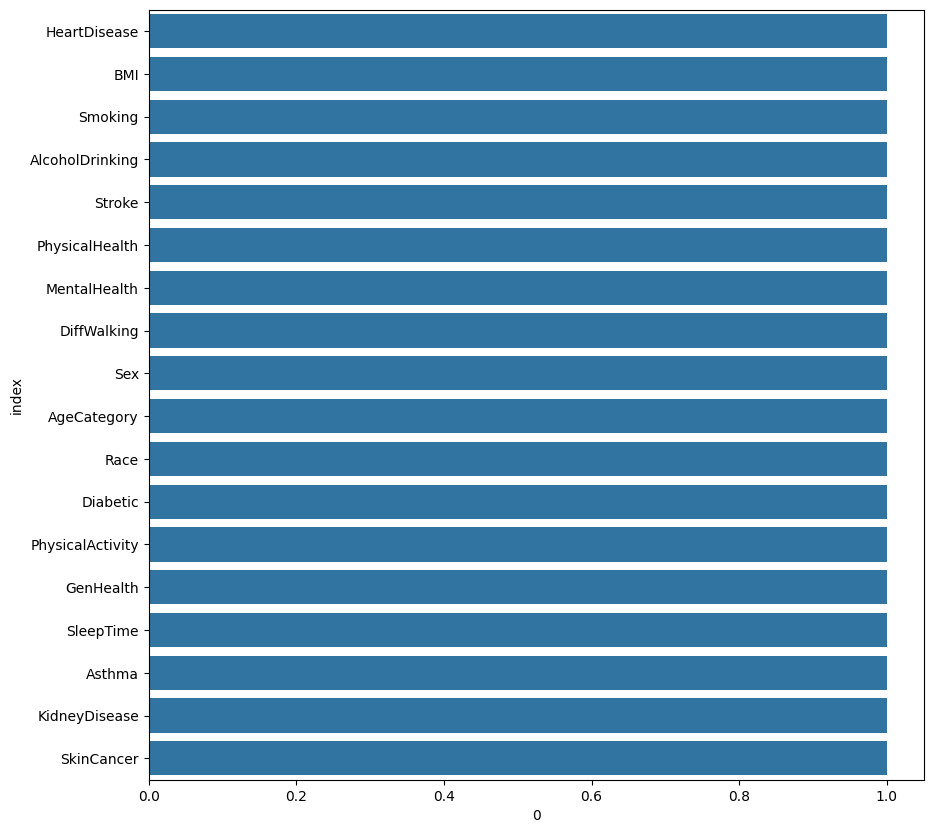

In [5]:
plt.figure(figsize=(10,10))
sns.barplot((pd.DataFrame(df.count())/df.shape[0]).reset_index(), x=0, y='index')
plt.show()

Descripción Estadistica de las variables numericas

In [6]:
stats = df.describe()
stats

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [7]:
# Funcion para limpiar nombres de columnas de espacios y caracteres especiales

def limpiar_nomb_colums(nombre_columna):
    nombre_columna = nombre_columna.strip()
    nombre_columna = nombre_columna.replace(' ', '_')
    nombre_columna = unidecode(nombre_columna)
    return nombre_columna


In [8]:
# Funcion para limpiar los espacios en blanco al inicio y al final

def limpiar_espacios_blancos(x):
  if isinstance(x, str):
    x = x.str.strip()
  else:
    x = x
  return x

In [9]:
# Funcion para cambiar valores None por NaN

def llenar_nan(x):
  if isinstance(x, str):
    x = x.fillna(np.NaN)
  else:
    x = x
  return x

In [10]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Aplicar limpieza General del DataFrame

In [11]:
df.apply(llenar_nan)
nombre_columnas_limpias = [limpiar_nomb_colums(col) for col in df.columns]
df.columns = nombre_columnas_limpias
df.apply(limpiar_espacios_blancos)
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No               3   
1                No  20.34      No              No    Yes               0   
2                No  26.58     Yes              No     No              20   
3                No  24.21      No              No     No               0   
4                No  23.71      No              No     No              28   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No               7   
319791           No  29.84     Yes              No     No               0   
319792           No  24.24      No              No     No               0   
319793           No  32.81      No              No     No               0   
319794           No  46.56      No              No     No               0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0                 30          No  Female        55-59     White      Yes   
1                  0          No  Female  80 or older     White       No   
2                 30          No    Male        65-69     White      Yes   
3                  0          No  Female        75-79     White       No   
4                  0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790             0         Yes    Male        60-64  Hispanic      Yes   
319791             0          No    Male        35-39  Hispanic       No   
319792             0          No  Female        45-49  Hispanic       No   
319793             0          No  Female        25-29  Hispanic       No   
319794             0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good          5    Yes            No        Yes  
1                   Yes  Very good          7     No            No         No  
2                   Yes       Fair          8    Yes            No         No  
3                    No       Good          6     No            No        Yes  
4                   Yes  Very good          8     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair          6    Yes            No         No  
319791              Yes  Very good          5    Yes            No         No  
319792              Yes       Good          6     No            No         No  
319793               No       Good         12     No            No         No  
319794              Yes       Good          8     No            No         No  

[319795 rows x 18 columns]

Verificacion de Nombre de Columnas despues de la Limpieza

In [12]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Columna: HeartDisease

In [13]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['HeartDisease'].nunique()

2

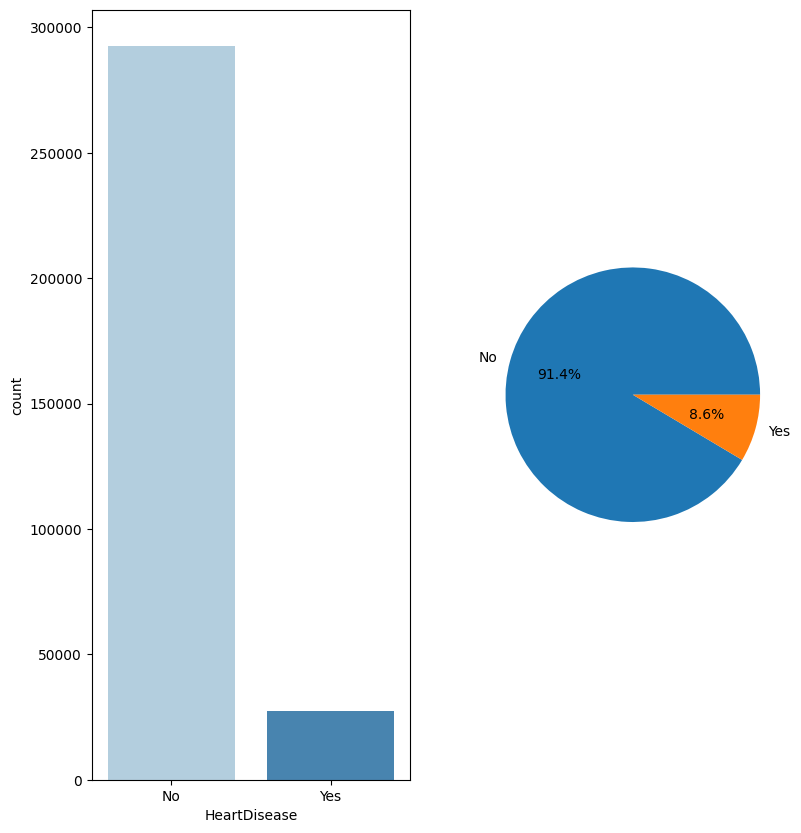

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (10,10))

sns.countplot(x='HeartDisease', palette='Blues', hue='HeartDisease', data=df, ax=axes[0])
plt.pie(df['HeartDisease'].value_counts(), autopct='%1.1f%%', labels=df['HeartDisease'].unique())
plt.subplots_adjust(left=0.2)
plt.show()

## Columna: BMI

In [16]:
df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

In [17]:
df['BMI'].nunique()

3604

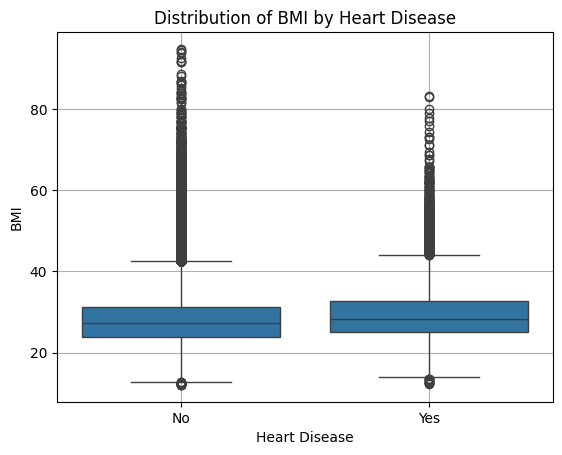

In [18]:
sns.boxplot(data = df, x = "HeartDisease", y = "BMI")
plt.xlabel("Heart Disease")
plt.ylabel("BMI")
plt.title("Distribution of BMI by Heart Disease")
plt.grid(True)
plt.show()

# Aplicar logaritmo

## Columna: Smoking

In [19]:
df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['Smoking'].nunique()

2

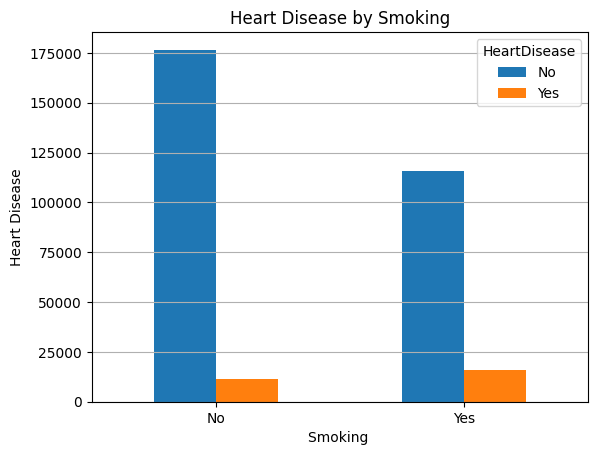

In [21]:
SMxHD = df.groupby(["Smoking", "HeartDisease"])["HeartDisease"].count().unstack()
SMxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Smoking ")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Smoking")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: AlcoholDrinking

In [22]:
df['AlcoholDrinking'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
df['AlcoholDrinking'].nunique()

2

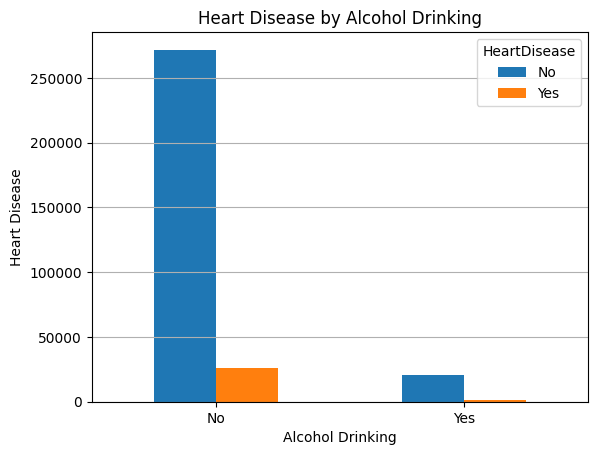

In [24]:
ADxHD = df.groupby(["AlcoholDrinking", "HeartDisease"])["HeartDisease"].count().unstack()
ADxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Alcohol Drinking")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Alcohol Drinking")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: Stroke

In [25]:
df['Stroke'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['Stroke'].nunique()

2

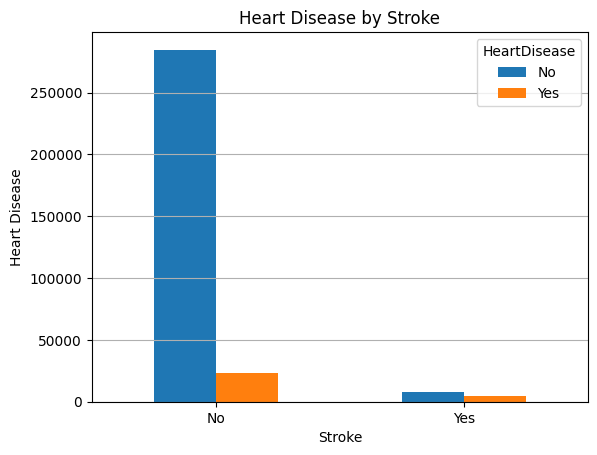

In [27]:
STxHD = df.groupby(["Stroke", "HeartDisease"])["HeartDisease"].count().unstack()
STxHD.plot(kind="bar", stacked=False)  # Adjust for stacked or side-by-side bars
plt.xlabel("Stroke")
plt.ylabel("Heart Disease")
plt.title("Heart Disease by Stroke")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

## Columna: PhysicalHealth

In [28]:
df['PhysicalHealth'].unique()

array([ 3,  0, 20, 28,  6, 15,  5, 30,  7,  1,  2, 21,  4, 10, 14, 18,  8,
       25, 16, 29, 27, 17, 24, 12, 23, 26, 22, 19,  9, 13, 11],
      dtype=int64)

In [29]:
df['PhysicalHealth'].nunique()

31

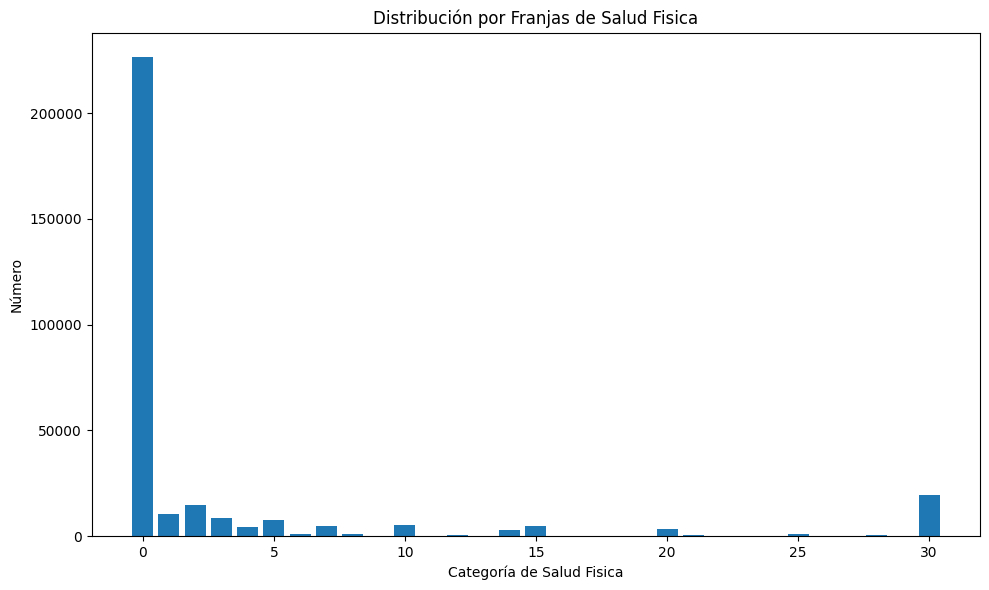

In [30]:
phys_counts = df['PhysicalHealth'].value_counts()  # Count occurrences of each age category

plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(phys_counts.index, phys_counts.values)  # Create bar chart
plt.title('Distribución por Franjas de Salud Fisica')  # Set title
plt.xlabel('Categoría de Salud Fisica')  # Set x-axis label
plt.ylabel('Número')  # Set y-axis label
plt.tight_layout()  # Adjust layout for better presentation

plt.show()  # Display the chart

## Columna: MentalHealth

In [31]:
df['MentalHealth'].unique()

array([30,  0,  2,  5, 15,  8,  4,  3, 10, 14, 20,  1,  7, 24,  9, 28, 16,
       12,  6, 25, 17, 18, 21, 29, 22, 13, 23, 27, 26, 11, 19],
      dtype=int64)

In [32]:
df['MentalHealth'].nunique()

31

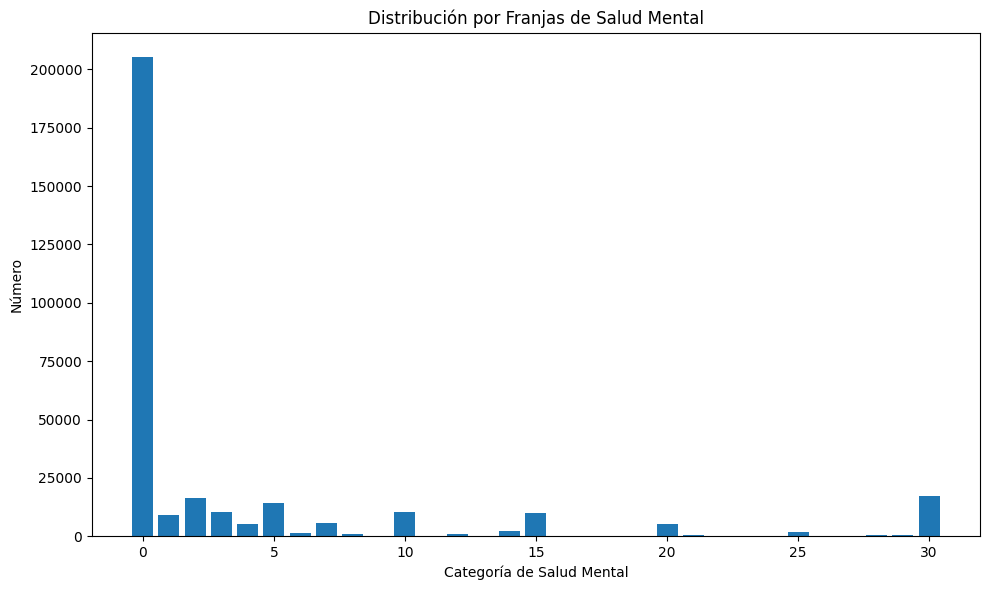

In [33]:
mtl_counts = df['MentalHealth'].value_counts()  # Count occurrences of each age category

plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(mtl_counts.index, mtl_counts.values)  # Create bar chart
plt.title('Distribución por Franjas de Salud Mental')  # Set title
plt.xlabel('Categoría de Salud Mental')  # Set x-axis label
plt.ylabel('Número')  # Set y-axis label
plt.tight_layout()  # Adjust layout for better presentation

plt.show()  # Display the chart

## Columna: DiffWalking

In [34]:
df['DiffWalking'].unique()

array(['No', 'Yes'], dtype=object)

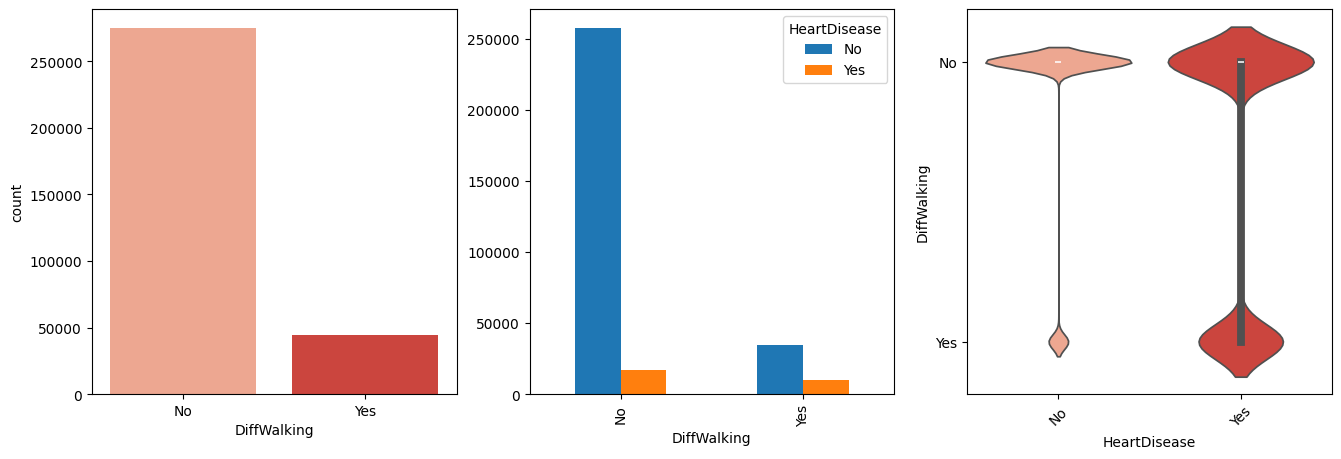

In [35]:
# Graficos 'DiffWalking'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='DiffWalking', data=df, hue='DiffWalking', palette='Reds', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['DiffWalking', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='DiffWalking', data=df, hue='HeartDisease', palette='Reds', ax=axes[2])
plt.show()

## Columna: Sex

In [36]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

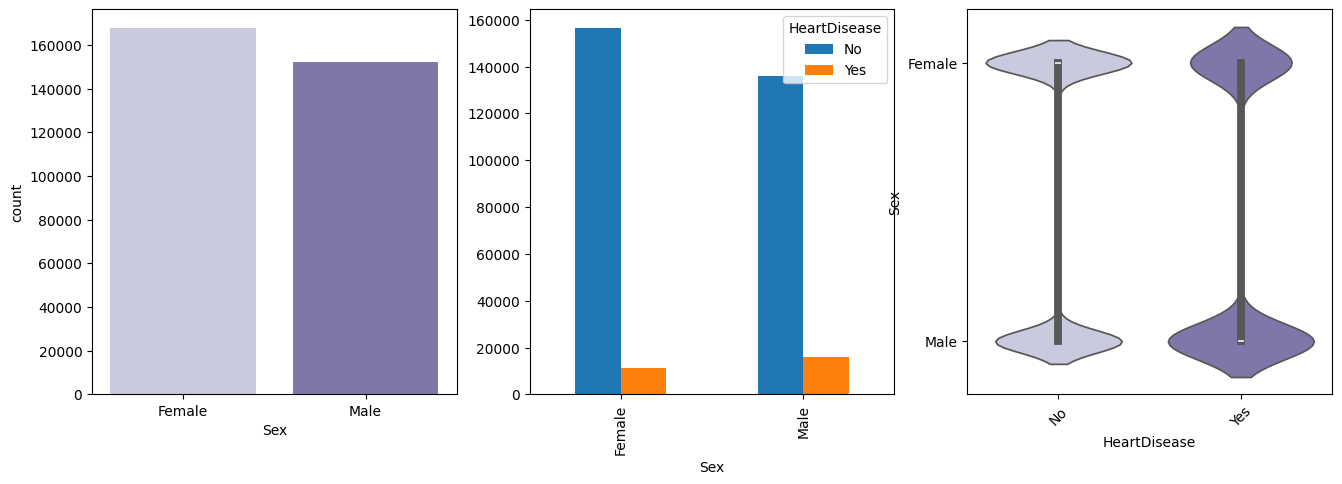

In [37]:
# Graficos 'Sex'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='Sex', data=df, hue='Sex', palette='Purples', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['Sex', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='Sex', data=df, hue='HeartDisease', palette='Purples', ax=axes[2])
plt.show()

## Columna: AgeCategory

In [38]:
# 2024-07-02 AGM
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [39]:
df['AgeCategory'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 319795 entries, 0 to 319794
Series name: AgeCategory
Non-Null Count   Dtype 
--------------   ----- 
319795 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


### Alternativa 1 (OneHotEncoder)

In [40]:
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)
tabla = one_hot_encoder.fit_transform(df[['AgeCategory']])
df_age_category = pd.DataFrame(tabla, columns = one_hot_encoder.get_feature_names_out(['AgeCategory']))
df_age_category.sample(5)

AgeCategory_18-24  AgeCategory_25-29  AgeCategory_30-34  \
138957                0.0                0.0                0.0   
317273                0.0                0.0                0.0   
1025                  0.0                0.0                0.0   
61269                 1.0                0.0                0.0   
207413                0.0                0.0                1.0   

        AgeCategory_35-39  AgeCategory_40-44  AgeCategory_45-49  \
138957                0.0                0.0                0.0   
317273                0.0                0.0                0.0   
1025                  0.0                0.0                0.0   
61269                 0.0                0.0                0.0   
207413                0.0                0.0                0.0   

        AgeCategory_50-54  AgeCategory_55-59  AgeCategory_60-64  \
138957                0.0                0.0                1.0   
317273                0.0                0.0                0.0   
1025                  1.0                0.0                0.0   
61269                 0.0                0.0                0.0   
207413                0.0                0.0                0.0   

        AgeCategory_65-69  AgeCategory_70-74  AgeCategory_75-79  \
138957                0.0                0.0                0.0   
317273                1.0                0.0                0.0   
1025                  0.0                0.0                0.0   
61269                 0.0                0.0                0.0   
207413                0.0                0.0                0.0   

        AgeCategory_80 or older  
138957                      0.0  
317273                      0.0  
1025                        0.0  
61269                       0.0  
207413                      0.0

In [41]:
df_age_category = df_age_category.astype(int)
df_age_category.dtypes

AgeCategory_18-24          int32
AgeCategory_25-29          int32
AgeCategory_30-34          int32
AgeCategory_35-39          int32
AgeCategory_40-44          int32
AgeCategory_45-49          int32
AgeCategory_50-54          int32
AgeCategory_55-59          int32
AgeCategory_60-64          int32
AgeCategory_65-69          int32
AgeCategory_70-74          int32
AgeCategory_75-79          int32
AgeCategory_80 or older    int32
dtype: object

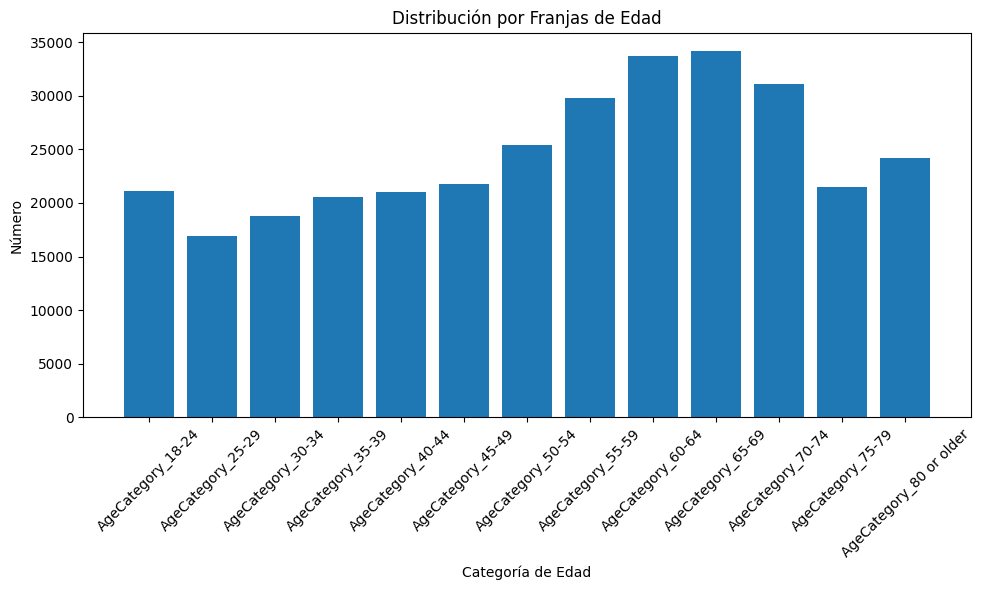

In [42]:
suma_edades = df_age_category.sum(axis = 0)

plt.figure(figsize=(10, 6))
plt.bar(suma_edades.index, suma_edades.values)
plt.title('Distribución por Franjas de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Número')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Alternativa 2 (map)

In [43]:
# 2024-07-04 AGM

df_age_category_map = df['AgeCategory'].map({'18-24':0,
                                           '25-29':1,
                                           '30-34':2,
                                           '35-39':3,
                                           '40-44':4,
                                           '45-49':5,
                                           '50-54':6,
                                           '55-59':7,
                                           '60-64':8,
                                           '65-69':9,
                                           '70-74':10,
                                           '75-79':11,
                                           '80 or older':12})
df_age_category_map.sample(5)

274572    5
214338    5
120889    5
279447    7
8681      8
Name: AgeCategory, dtype: int64

### Alternativa 3(if/elif)

In [44]:
def Age_Category(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == '18-24':
    return 0
  elif x == '25-29':
    return 1
  elif x == '30-34':
    return 2
  elif x == '35-39':
    return 3
  elif x == '40-44':
    return 4
  elif x == '45-49':
    return 5
  elif x == '50-54':
    return 6
  elif x == '55-59':
    return 7
  elif x == '60-64':
    return 8
  elif x == '65-69':
    return 9
  elif x == '70-74':
    return 10
  elif x == '75-79':
    return 11
  elif x == '80 or older':
    return 12

In [45]:
df_age_category_if_elif = df['AgeCategory'].apply(Age_Category)
df_age_category_if_elif.sample(5)

91656     9
140392    4
258816    9
301431    6
37488     4
Name: AgeCategory, dtype: int64

## Columna: Race

In [46]:
# 2024-07-02 AGM

df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [47]:
one_hot_encoder = OneHotEncoder(drop = None, sparse_output = False)
tabla = one_hot_encoder.fit_transform(df[['Race']])
df_race = pd.DataFrame(tabla, columns = one_hot_encoder.get_feature_names_out(['Race']))
df_race.sample(5)

Race_American Indian/Alaskan Native  Race_Asian  Race_Black  \
135265                                  0.0         0.0         0.0   
100770                                  0.0         0.0         0.0   
124135                                  0.0         0.0         1.0   
137606                                  0.0         0.0         0.0   
54302                                   0.0         0.0         0.0   

        Race_Hispanic  Race_Other  Race_White  
135265            0.0         0.0         1.0  
100770            0.0         0.0         1.0  
124135            0.0         0.0         0.0  
137606            0.0         0.0         1.0  
54302             0.0         0.0         1.0

In [48]:
df_race = df_race.astype(int)
df_race.sample(5)

Race_American Indian/Alaskan Native  Race_Asian  Race_Black  \
151484                                    0           0           1   
55222                                     0           0           0   
145316                                    0           0           0   
63199                                     0           1           0   
78817                                     0           0           0   

        Race_Hispanic  Race_Other  Race_White  
151484              0           0           0  
55222               0           0           1  
145316              0           0           1  
63199               0           0           0  
78817               0           1           0

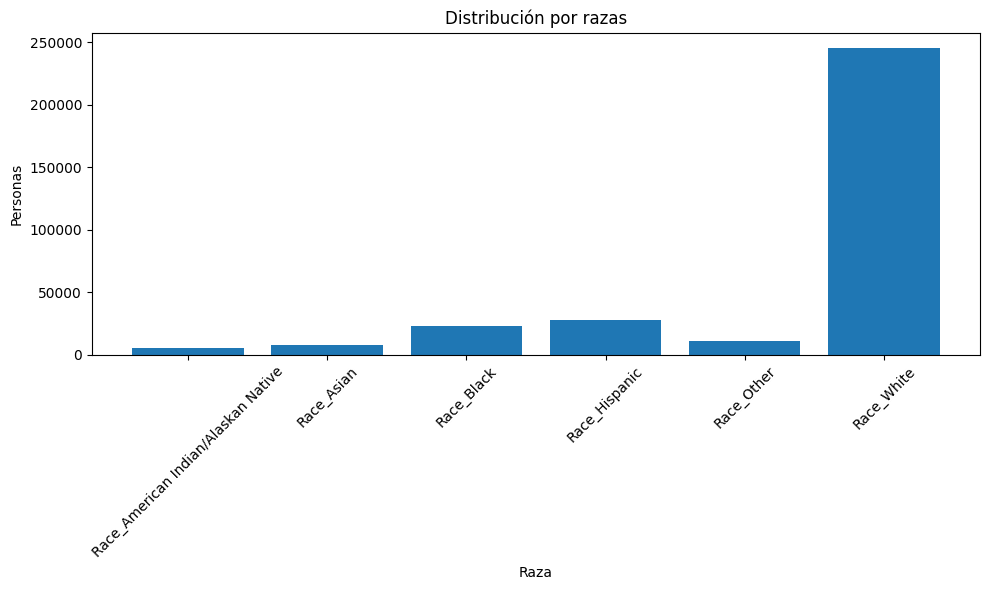

In [49]:
suma_razas = df_race.sum(axis = 0)

plt.figure(figsize = (10, 6))
plt.bar(suma_razas.index, suma_razas.values)
plt.title('Distribución por razas')
plt.xlabel('Raza')
plt.ylabel('Personas')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()


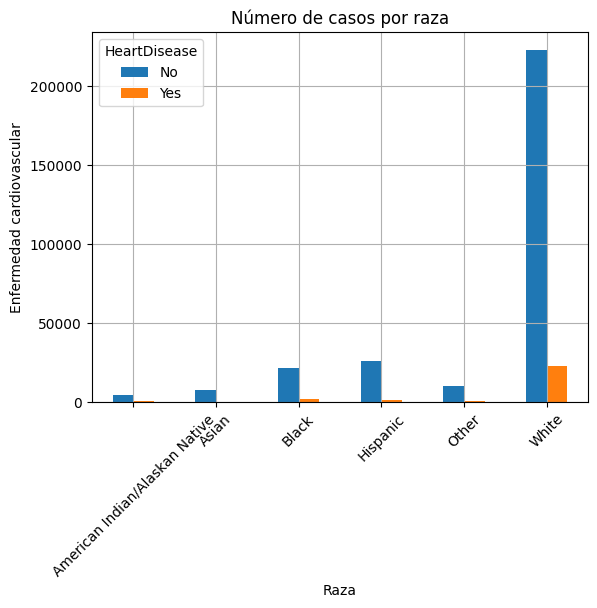

In [50]:
race_vs_hd = df.groupby(['Race', 'HeartDisease'])['HeartDisease'].count().unstack()
race_vs_hd.plot(kind = 'bar', stacked = False)
plt.xlabel('Raza')
plt.ylabel('Enfermedad cardiovascular')
plt.title('Número de casos por raza')
plt.xticks(rotation = 45)
plt.grid(True)

plt.show()

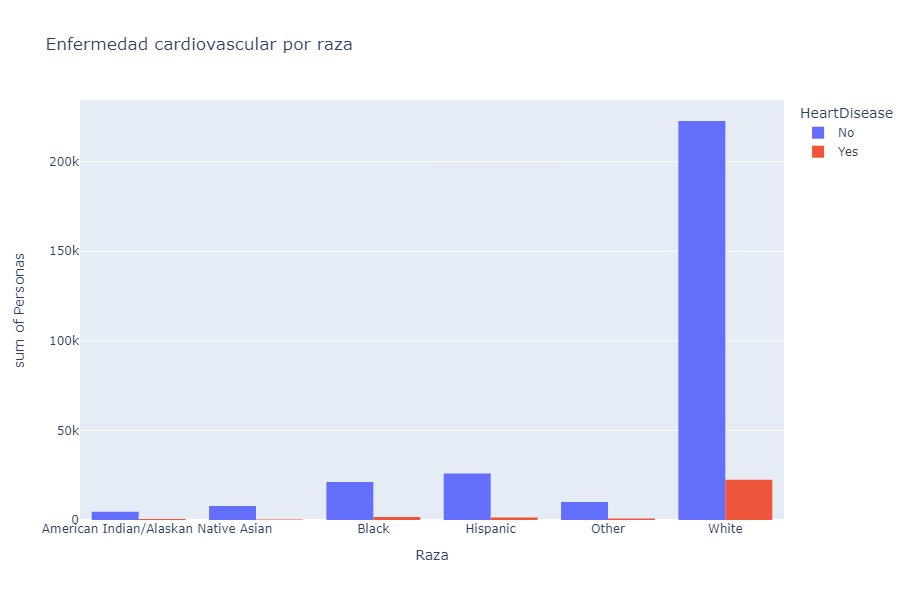

In [51]:
# Experimento con plotly.express https://plotly.com/python/bar-charts/
import plotly.express as px
race_vs_hd = df.groupby(['Race', 'HeartDisease']).size().reset_index(name='Casos')
fig = px.histogram(race_vs_hd,
                   x = 'Race',
                   y = 'Casos',
                   color = 'HeartDisease',
                   barmode = 'group',
                   height = 600,
                   width = 1024,
                   labels = {
                       'Race': 'Raza',
                       'Casos': 'Personas'
                   },
                   title = 'Enfermedad cardiovascular por raza')
fig.show()

## Columna: Diabetic

In [52]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [53]:
df['Diabetic'].nunique()

4

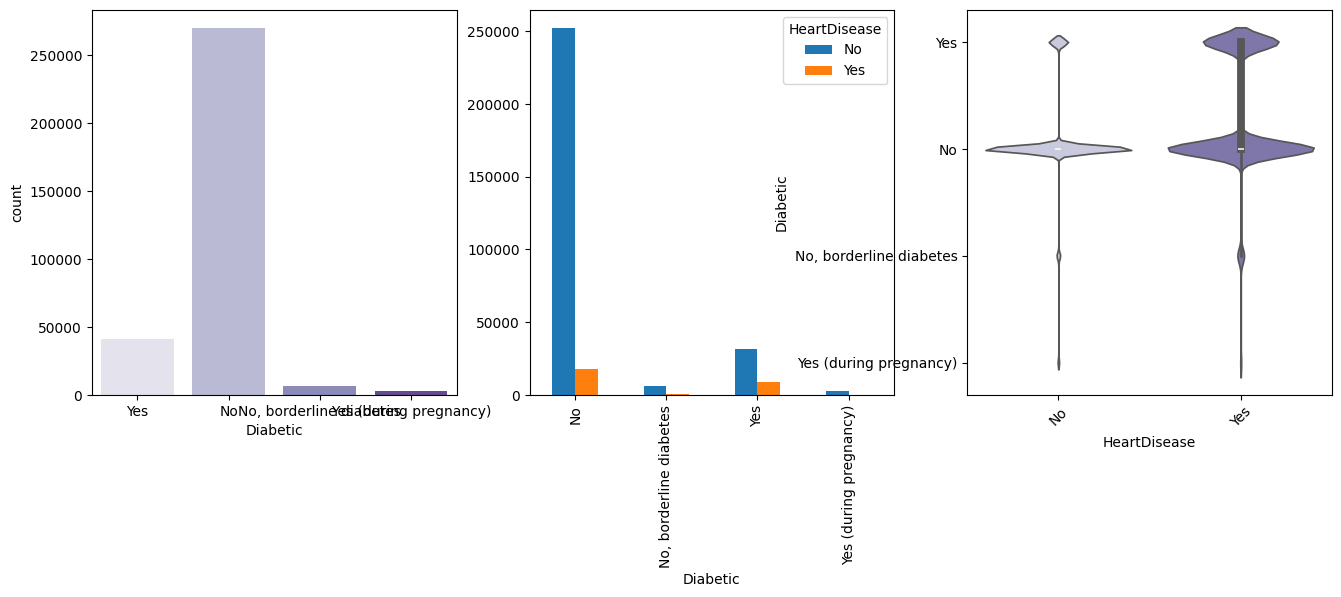

In [54]:
# Graficos 'Diabetic'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='Diabetic', data=df, hue='Diabetic', palette='Purples', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['Diabetic', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='Diabetic', data=df, hue='HeartDisease', palette='Purples', ax=axes[2])
plt.show()

## Columna: PhysicalActivity

In [55]:
df['PhysicalActivity'].unique()

array(['Yes', 'No'], dtype=object)

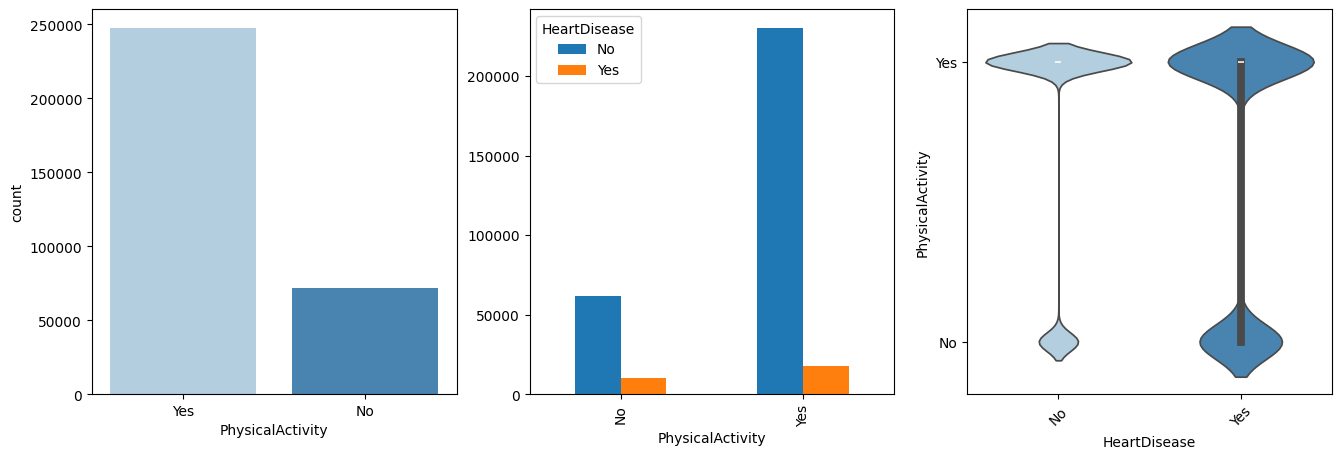

In [56]:
# Graficos 'Physical Activity'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='PhysicalActivity', data=df, hue='PhysicalActivity', palette='Blues', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['PhysicalActivity', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='PhysicalActivity', data=df, hue='HeartDisease', palette='Blues', ax=axes[2])
plt.show()

## Columna: GenHealth

In [57]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [58]:
df['GenHealth'].nunique()

5

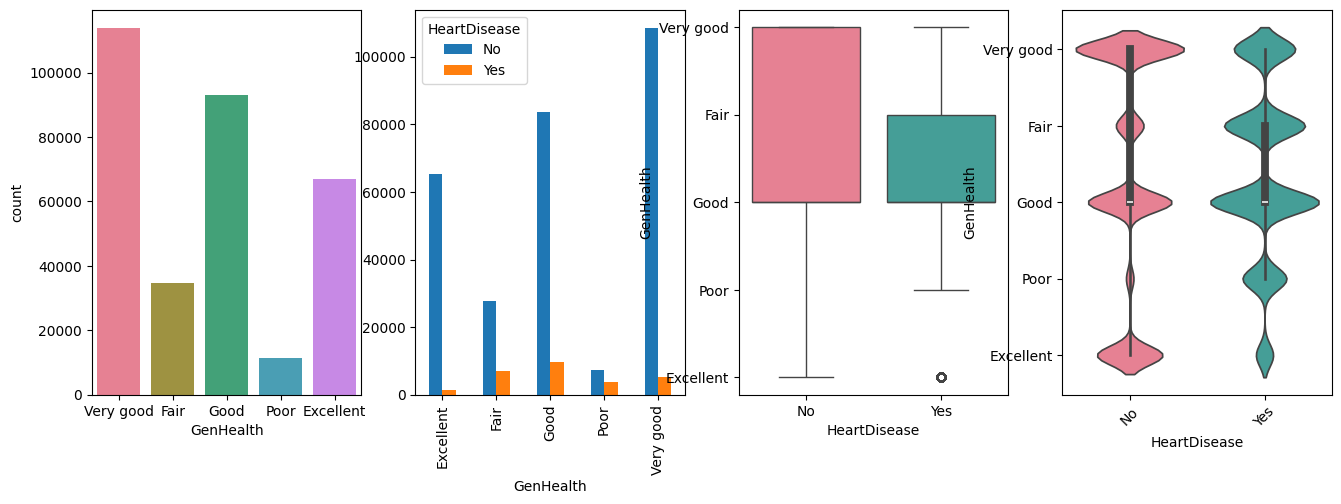

In [59]:
# Graficos 'GenHealth'

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

sns.countplot(x='GenHealth', data=df, hue='GenHealth', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['GenHealth', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.boxplot(x='HeartDisease', y='GenHealth', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
sns.violinplot(x='HeartDisease', y='GenHealth', data=df, hue='HeartDisease', palette='husl', ax=axes[3])
plt.show()

## Columna: SleepTime

In [60]:
df['SleepTime'].unique()

array([ 5,  7,  8,  6, 12,  4,  9, 10, 15,  3,  2,  1, 16, 18, 14, 20, 11,
       13, 17, 24, 19, 21, 22, 23], dtype=int64)

In [61]:
df['SleepTime'].nunique()

24

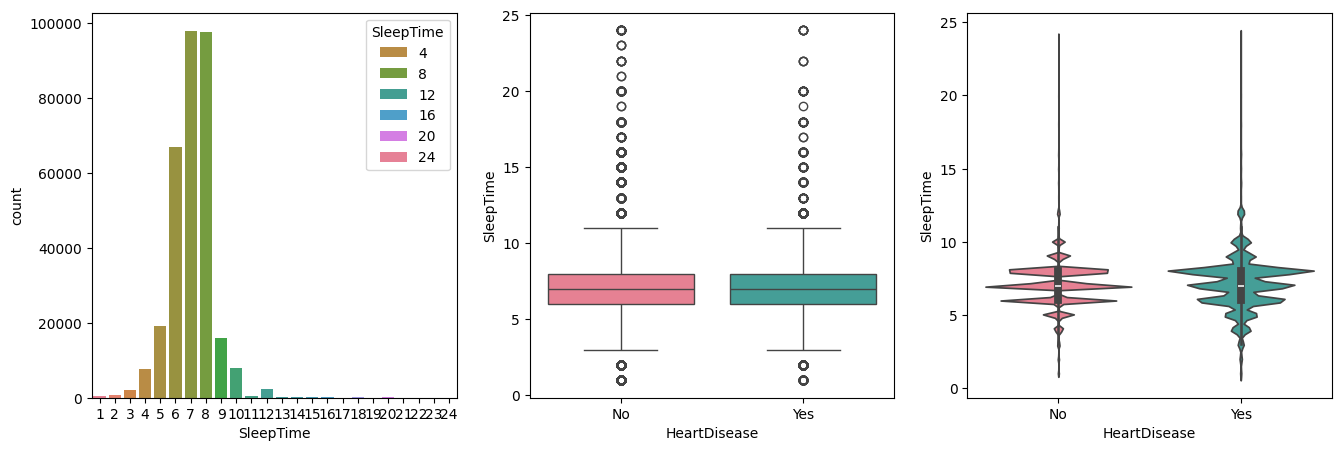

In [62]:
# Graficos 'SleepTime'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='SleepTime', data=df, hue='SleepTime', palette='husl', ax=axes[0])
sns.boxplot(x='HeartDisease', y='SleepTime', data=df, hue='HeartDisease', palette='husl', ax=axes[1])
sns.violinplot(x='HeartDisease', y='SleepTime', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

## Columna: Asthma

In [63]:
df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

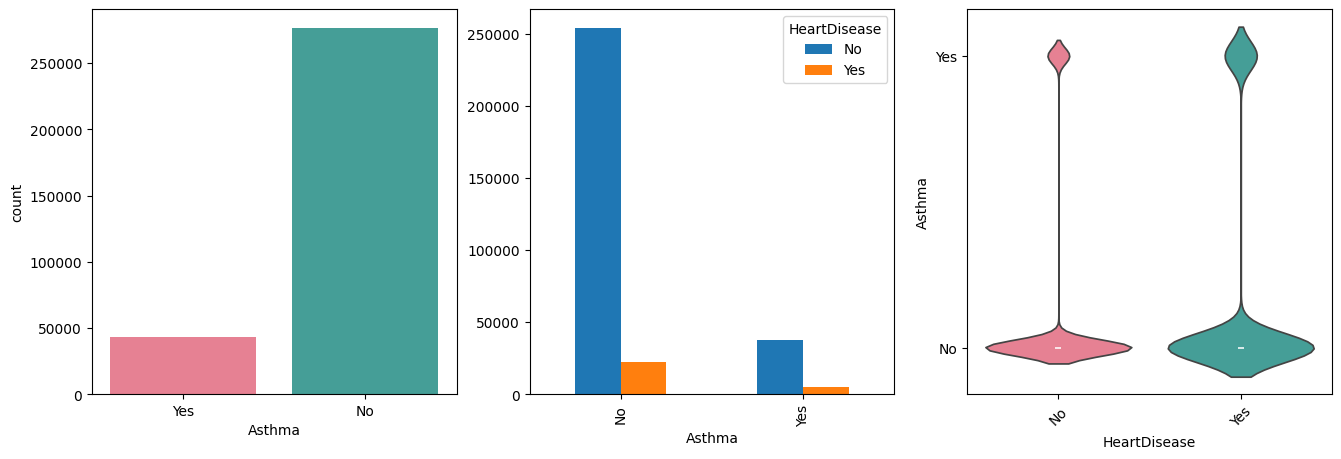

In [64]:
# Graficos 'Asthma'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='Asthma', data=df, hue='Asthma', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['Asthma', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='Asthma', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

## Columna: KidneyDisease

In [65]:
df['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

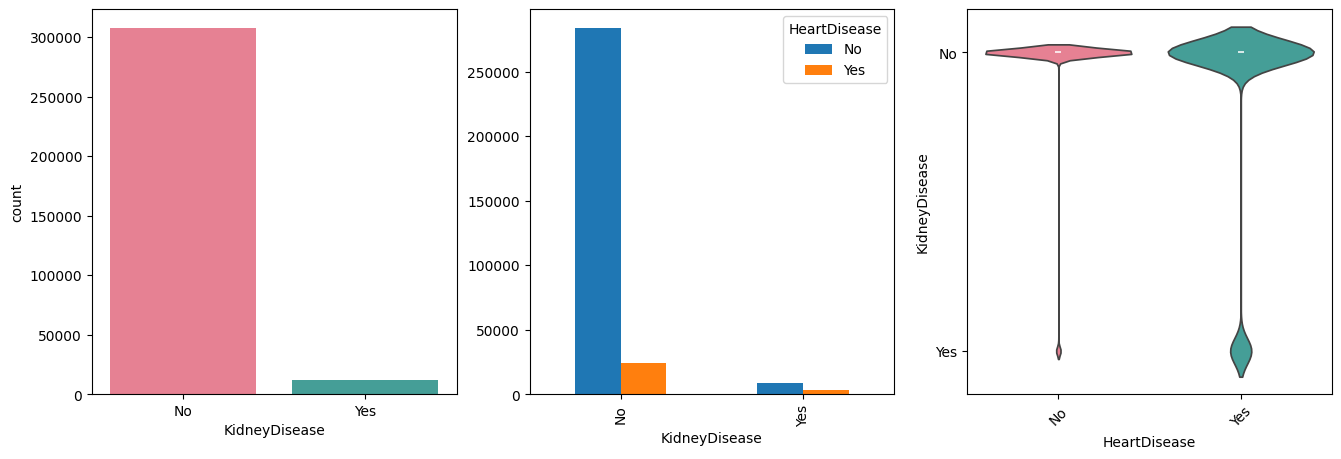

In [66]:
# Graficos 'KidneyDisease'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='KidneyDisease', data=df, hue='KidneyDisease', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['KidneyDisease', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='KidneyDisease', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

## Columna: SkinCancer

In [67]:
df['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

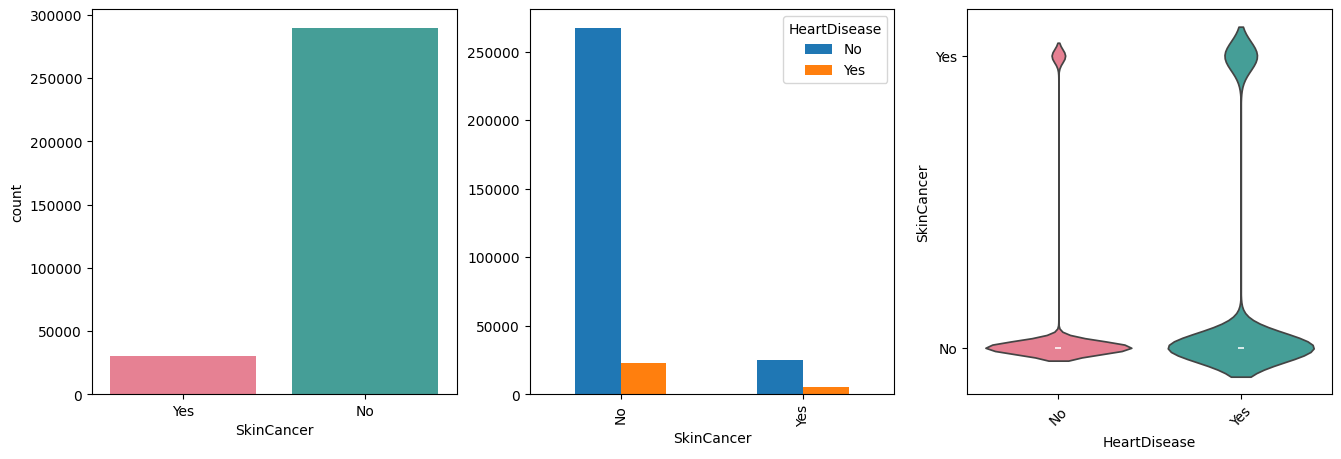

In [68]:
# Graficos 'SkinCancer'

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='SkinCancer', data=df, hue='SkinCancer', palette='husl', ax=axes[0])
plt.xticks(rotation=45)
df_agrupado = df.groupby(['SkinCancer', 'HeartDisease']).size().unstack()
df_agrupado.plot(kind='bar', stacked=False, ax=axes[1])
sns.violinplot(x='HeartDisease', y='SkinCancer', data=df, hue='HeartDisease', palette='husl', ax=axes[2])
plt.show()

# 04. Modelos, Métricas y Métodos de Validación

En esta etapa vamos a implementar los modelos de Machine Learning que se adecuen mejor al problema y como consecuencia las métricas de cada modelo.

*  Primero vamos a entrenar diferentes modelos y calcular todas las métricas y dependiendo de la naturaleza del problema vamos a seleccionar el modelo que mejor desempeño tiene, utilizando los 3 métodos de validación.

*  Luego vamos a hacerle "Tuning" con GridSearchCV para encontrar los mejores parámetros para el modelo.

En caso de estar haciendo un Algoritmo Genético o un Recomendador el objetivo de esta parte deberá ser el de mejorar el modelo para que sea más eficiente.

Verificación de columnas al azar para su posterior modificación.

In [69]:
df.sample(5)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
262321          Yes  28.19     Yes              No     No               0   
235212           No  29.29      No              No     No               0   
36381            No  27.46      No              No     No               1   
201874           No  29.18      No              No     No               0   
63960            No  23.41     Yes              No     No               0   

        MentalHealth DiffWalking     Sex AgeCategory   Race Diabetic  \
262321             0          No  Female       75-79  White      Yes   
235212             0          No  Female       70-74  White       No   
36381             15          No  Female       35-39  White       No   
201874             5          No  Female       70-74  White       No   
63960              0          No  Female       65-69  Other       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
262321              Yes       Good          7     No            No         No  
235212              Yes  Very good          7     No            No         No  
36381                No  Very good          8    Yes            No         No  
201874              Yes  Very good          7     No            No         No  
63960               Yes  Excellent          7     No            No        Yes

Duplicación del DF original para realizar los encodings necesarios y prepararlo para el Machine Learning

In [70]:
df_ml = df.copy()
df_ml.sample(5)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
72268            No  27.89     Yes              No     No               0   
211771           No  35.73      No              No     No               0   
303037           No  25.77      No              No     No               7   
110264           No  24.11      No             Yes     No              30   
93018            No  26.11      No              No     No               0   

        MentalHealth DiffWalking   Sex AgeCategory      Race Diabetic  \
72268              3          No  Male       70-74     White       No   
211771             7          No  Male       50-54  Hispanic       No   
303037             0          No  Male       55-59     White       No   
110264             0         Yes  Male       65-69     White       No   
93018              0          No  Male       30-34     White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
72268               Yes  Very good          6     No            No         No  
211771              Yes  Very good          6     No            No         No  
303037              Yes  Excellent          8     No            No         No  
110264              Yes       Good          7     No            No         No  
93018               Yes  Very good          8     No            No         No

Encoding de variables Binarias para cambiar los valores a 0 y 1

In [71]:
columns_yes_no = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in columns_yes_no:
    df_ml[column] = df_ml[column].map({'Yes':1, 'No':0})

df_ml['Sex'] = df_ml['Sex'].map({'Male':0, 'Female':1})

df_ml.sample(5)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
105903             0  23.57        0                0       0               0   
302734             0  41.81        0                0       0               0   
258017             1  26.63        1                0       0               0   
240932             0  24.68        0                0       0               1   
174225             0  35.15        1                0       0               0   

        MentalHealth  DiffWalking  Sex AgeCategory   Race Diabetic  \
105903             0            0    1       45-49  White       No   
302734             0            0    1       50-54  White       No   
258017            10            0    1       75-79  White       No   
240932             0            0    0       75-79  White       No   
174225             0            0    0       70-74  White      Yes   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
105903                 1  Excellent          8       0              0   
302734                 0       Good          5       0              0   
258017                 0       Good          8       0              0   
240932                 1  Very good          8       0              0   
174225                 1       Good          8       0              0   

        SkinCancer  
105903           0  
302734           0  
258017           0  
240932           1  
174225           0



Modificación de la variable 'AgeCategory' de categorica STR a categorica INT

siendo 0 el valor menor y 12 el valor mayor.


In [72]:
def Age_Category(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == '18-24':
    return 0
  elif x == '25-29':
    return 1
  elif x == '30-34':
    return 2
  elif x == '35-39':
    return 3
  elif x == '40-44':
    return 4
  elif x == '45-49':
    return 5
  elif x == '50-54':
    return 6
  elif x == '55-59':
    return 7
  elif x == '60-64':
    return 8
  elif x == '65-69':
    return 9
  elif x == '70-74':
    return 10
  elif x == '75-79':
    return 11
  elif x == '80 or older':
    return 12

In [73]:
df_ml['AgeCategory'] = df_ml['AgeCategory'].apply(Age_Category)
df_ml

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0               3   
1                  0  20.34        0                0       1               0   
2                  0  26.58        1                0       0              20   
3                  0  24.21        0                0       0               0   
4                  0  23.71        0                0       0              28   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0               7   
319791             0  29.84        1                0       0               0   
319792             0  24.24        0                0       0               0   
319793             0  32.81        0                0       0               0   
319794             0  46.56        0                0       0               0   

        MentalHealth  DiffWalking  Sex  AgeCategory      Race Diabetic  \
0                 30            0    1            7     White      Yes   
1                  0            0    1           12     White       No   
2                 30            0    0            9     White      Yes   
3                  0            0    1           11     White       No   
4                  0            1    1            4     White       No   
...              ...          ...  ...          ...       ...      ...   
319790             0            1    0            8  Hispanic      Yes   
319791             0            0    0            3  Hispanic       No   
319792             0            0    1            5  Hispanic       No   
319793             0            0    1            1  Hispanic       No   
319794             0            0    1           12  Hispanic       No   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1  Very good          5       1              0   
1                      1  Very good          7       0              0   
2                      1       Fair          8       1              0   
3                      0       Good          6       0              0   
4                      1  Very good          8       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0       Fair          6       1              0   
319791                 1  Very good          5       1              0   
319792                 1       Good          6       0              0   
319793                 0       Good         12       0              0   
319794                 1       Good          8       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319795 rows x 18 columns]

Modificación de la variable 'Diabetic' de categorica STR a categorica INT siendo 0 el valor menor y 3 el valor mayor

In [74]:
def Diabetic_clasification(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == 'No':
    return 0
  elif x == 'No, borderline diabetes':
    return 1
  elif x == 'Yes (during pregnancy)':
    return 2
  elif x == 'Yes':
    return 3

In [75]:
df_ml['Diabetic'] = df_ml['Diabetic'].apply(Diabetic_clasification)
df_ml

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0               3   
1                  0  20.34        0                0       1               0   
2                  0  26.58        1                0       0              20   
3                  0  24.21        0                0       0               0   
4                  0  23.71        0                0       0              28   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0               7   
319791             0  29.84        1                0       0               0   
319792             0  24.24        0                0       0               0   
319793             0  32.81        0                0       0               0   
319794             0  46.56        0                0       0               0   

        MentalHealth  DiffWalking  Sex  AgeCategory      Race  Diabetic  \
0                 30            0    1            7     White         3   
1                  0            0    1           12     White         0   
2                 30            0    0            9     White         3   
3                  0            0    1           11     White         0   
4                  0            1    1            4     White         0   
...              ...          ...  ...          ...       ...       ...   
319790             0            1    0            8  Hispanic         3   
319791             0            0    0            3  Hispanic         0   
319792             0            0    1            5  Hispanic         0   
319793             0            0    1            1  Hispanic         0   
319794             0            0    1           12  Hispanic         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1  Very good          5       1              0   
1                      1  Very good          7       0              0   
2                      1       Fair          8       1              0   
3                      0       Good          6       0              0   
4                      1  Very good          8       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0       Fair          6       1              0   
319791                 1  Very good          5       1              0   
319792                 1       Good          6       0              0   
319793                 0       Good         12       0              0   
319794                 1       Good          8       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319795 rows x 18 columns]

Modificación de la variable 'GenHealth' de categorica STR a categorica INT
siendo 0 el valor menor y 4 el valor mayor.

In [76]:
def health_clasification(x):
  if x == None:
    return np.nan

  x = x.strip()

  if x == 'Poor':
    return 0
  elif x == 'Fair':
    return 1
  elif x == 'Good':
    return 2
  elif x == 'Very good':
    return 3
  elif x == 'Excellent':
    return 4

In [77]:
df_ml['GenHealth'] = df_ml['GenHealth'].apply(health_clasification)

In [78]:
df_ml.sample(5)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
35566              0  24.39        0                0       0               0   
54378              1  32.45        0                0       0               0   
167959             0  21.29        0                0       0               0   
253853             0  29.05        0                0       0               0   
125702             0  21.43        0                0       0               0   

        MentalHealth  DiffWalking  Sex  AgeCategory   Race  Diabetic  \
35566              0            0    0            3  White         1   
54378              0            0    1           11  Black         3   
167959             0            0    1            7  White         0   
253853             2            0    1            5  White         3   
125702             0            1    1           11  White         3   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
35566                  1          4          7       0              0   
54378                  0          2          7       1              0   
167959                 1          4          7       0              0   
253853                 0          3          7       0              0   
125702                 0          2          8       0              0   

        SkinCancer  
35566            0  
54378            0  
167959           0  
253853           1  
125702           1

Aplicación de logaritmo a la Variable BMI

In [79]:
df_ml['BMI'] = df_ml['BMI'].apply(np.log)
df_ml.sample(5)

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
92782              0  3.410157        0                0       0   
69029              0  3.423611        1                0       0   
134126             0  3.381675        1                0       0   
174100             0  3.369018        0                0       0   
298246             0  3.647276        1                0       0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory   Race  \
92782               14             3            0    0            5  White   
69029                0             0            1    0            6  White   
134126               0             0            0    0            7  White   
174100               0             0            0    1            7  White   
298246               0            30            0    0            9  White   

        Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
92782          0                 1          1          8       0   
69029          0                 0          2          7       0   
134126         0                 1          2          9       0   
174100         0                 1          2          6       0   
298246         0                 1          2          7       0   

        KidneyDisease  SkinCancer  
92782               0           0  
69029               0           0  
134126              0           0  
174100              0           0  
298246              0           1

Se elimina la variable 'Race' y se concatena el df_ml con el df_race para agregar las nuevas variables encodeadas sin prioridad en la Raza



In [80]:
df_ml = df_ml.drop('Race', axis=1)
df_ml

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                  0  2.809403        1                0       0   
1                  0  3.012589        0                0       1   
2                  0  3.280159        1                0       0   
3                  0  3.186766        0                0       0   
4                  0  3.165897        0                0       0   
...              ...       ...      ...              ...     ...   
319790             1  3.310908        1                0       0   
319791             0  3.395850        1                0       0   
319792             0  3.188004        0                0       0   
319793             0  3.490733        0                0       0   
319794             0  3.840742        0                0       0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Diabetic  \
0                    3            30            0    1            7         3   
1                    0             0            0    1           12         0   
2                   20            30            0    0            9         3   
3                    0             0            0    1           11         0   
4                   28             0            1    1            4         0   
...                ...           ...          ...  ...          ...       ...   
319790               7             0            1    0            8         3   
319791               0             0            0    0            3         0   
319792               0             0            0    1            5         0   
319793               0             0            0    1            1         0   
319794               0             0            0    1           12         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          3          5       1              0   
1                      1          3          7       0              0   
2                      1          1          8       1              0   
3                      0          2          6       0              0   
4                      1          3          8       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          1          6       1              0   
319791                 1          3          5       1              0   
319792                 1          2          6       0              0   
319793                 0          2         12       0              0   
319794                 1          2          8       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319795 rows x 17 columns]

Concatenación de Dataframes 'df_ml' y 'df_race'


In [81]:
df_ml = pd.concat([df_ml, df_race], axis = 1)
df_ml.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')

In [82]:
df_ml.sample(5)

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
235196             0  3.312002        1                0       0   
38881              0  3.050694        0                0       0   
234998             0  3.165053        0                0       0   
148832             0  3.489513        0                0       0   
287132             0  3.264232        1                0       0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Diabetic  \
235196               0             0            0    1            9         0   
38881               14             0            0    1            7         0   
234998               1            10            0    1            9         0   
148832               0             0            0    1            7         3   
287132              10             0            0    0            8         1   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
235196                 1          2          7       0              0   
38881                  1          3          7       0              0   
234998                 1          3          7       0              0   
148832                 0          1          6       0              0   
287132                 1          2          6       0              0   

        SkinCancer  Race_American Indian/Alaskan Native  Race_Asian  \
235196           0                                    0           0   
38881            0                                    0           0   
234998           1                                    0           0   
148832           0                                    0           0   
287132           0                                    0           0   

        Race_Black  Race_Hispanic  Race_Other  Race_White  
235196           0              0           0           1  
38881            0              0           0           1  
234998           0              0           0           1  
148832           1              0           0           0  
287132           0              0           0           1

Eliminación de valores Nan

In [83]:
df_ml.dropna(inplace = True)

Eliminación de Outliers

In [84]:
def filtrar_outliers(serie):
    Q1 = df_ml[serie].quantile(0.25)
    Q3 = df_ml[serie].quantile(0.75)

    ric = Q3 - Q1

    lim_l = Q1 - 1.5*ric
    lim_r = Q3 + 1.5*ric

    return df_ml[df_ml[serie].between(lim_l, lim_r)]

In [85]:
df_ml = filtrar_outliers("BMI")
df_ml = filtrar_outliers("SleepTime")

Distribución de variables para el entrenamiento y predicción. Variable a predecir (Target): HeartDisease

In [86]:
df_ml_copy = df_ml.copy()

X = df_ml_copy.drop('HeartDisease', axis = 1)
y = df_ml_copy['HeartDisease']

In [87]:
df_ml_copy

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                  0  2.809403        1                0       0   
1                  0  3.012589        0                0       1   
2                  0  3.280159        1                0       0   
3                  0  3.186766        0                0       0   
4                  0  3.165897        0                0       0   
...              ...       ...      ...              ...     ...   
319789             0  3.100993        0                0       0   
319790             1  3.310908        1                0       0   
319791             0  3.395850        1                0       0   
319792             0  3.188004        0                0       0   
319794             0  3.840742        0                0       0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Diabetic  \
0                    3            30            0    1            7         3   
1                    0             0            0    1           12         0   
2                   20            30            0    0            9         3   
3                    0             0            0    1           11         0   
4                   28             0            1    1            4         0   
...                ...           ...          ...  ...          ...       ...   
319789               0             0            0    1            0         0   
319790               7             0            1    0            8         3   
319791               0             0            0    0            3         0   
319792               0             0            0    1            5         0   
319794               0             0            0    1           12         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          3          5       1              0   
1                      1          3          7       0              0   
2                      1          1          8       1              0   
3                      0          2          6       0              0   
4                      1          3          8       0              0   
...                  ...        ...        ...     ...            ...   
319789                 1          4          8       0              0   
319790                 0          1          6       1              0   
319791                 1          3          5       1              0   
319792                 1          2          6       0              0   
319794                 1          2          8       0              0   

        SkinCancer  Race_American Indian/Alaskan Native  Race_Asian  \
0                1                                    0           0   
1                0                                    0           0   
2                0                                    0           0   
3                1                                    0           0   
4                0                                    0           0   
...            ...                                  ...         ...   
319789           0                                    0           0   
319790           0                                    0           0   
319791           0                                    0           0   
319792           0                                    0           0   
319794           0                                    0           0   

        Race_Black  Race_Hispanic  Race_Other  Race_White  
0                0              0           0           1  
1                0              0           0           1  
2                0              0           0           1  
3                0              0           0           1  
4                0              0           0           1  
...            ...            ...         ...         ...  
319789           0              1           0           0  
319790  

Distribución de variables a un 0.20 con train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Normalización de Datos con el metodo MinMaxScaler.

In [89]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Funcíon de Entrenamiento y Evaluación de Modelos

In [98]:
# Función para entrenar y evaluar un modelo
def func_train_and_evaluate_model(modelo, nombre_modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)
    
    print(f"Resultados para {nombre_modelo}:\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob)}\n")
    print("-" * 60)

    # Almacenar resultados en la lista
    resultados.append({
        'Modelo': nombre,
        'Matriz de confusión': confusion_matrix(y_test, y_pred),
        
        'Reporte de clasificación': classification_report(y_test, y_pred, output_dict = True),
        'ROC AUC Score': roc_auc_score(y_test, y_prob)
    })

modelos = [(LogisticRegression(max_iter = 1000), 'Regresión logística'),
           (DecisionTreeClassifier(), 'Árbol de decisión'),
           (RandomForestClassifier(), 'Random forest'),
           (GradientBoostingClassifier(), 'Gradient boosting'),
           (AdaBoostClassifier(algorithm = 'SAMME'), 'Adaboost'),
           (KNeighborsClassifier(), 'KNN'),
           (GaussianNB(), 'Gaussian NB'),
           (LinearDiscriminantAnalysis(), 'LDA'),
           (QuadraticDiscriminantAnalysis(), 'QDA')]

resultados = []

Entrenamiento y evaluación de Modelos ML

In [99]:
# Entrenamiento y evaluación de los modelos
for modelo, nombre in modelos:
    resultado_modelo = func_train_and_evaluate_model(modelo, nombre)

Resultados para Regresión logística:

[[56351   468]
 [ 4661   567]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56819
           1       0.55      0.11      0.18      5228

    accuracy                           0.92     62047
   macro avg       0.74      0.55      0.57     62047
weighted avg       0.89      0.92      0.89     62047

ROC AUC Score: 0.8409927718770001

------------------------------------------------------------
Resultados para Árbol de decisión:

[[52331  4488]
 [ 3958  1270]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     56819
           1       0.22      0.24      0.23      5228

    accuracy                           0.86     62047
   macro avg       0.58      0.58      0.58     62047
weighted avg       0.87      0.86      0.87     62047

ROC AUC Score: 0.5822531208343256

------------------------------------------------------------
Resultados para Ra

In [100]:
# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar el DataFrame con los resultados
print(df_resultados)

                Modelo            Matriz de confusión  \
0  Regresión logística    [[56351, 468], [4661, 567]]   
1    Árbol de decisión  [[52331, 4488], [3958, 1270]]   
2        Random forest   [[55674, 1145], [4634, 594]]   
3    Gradient boosting    [[56427, 392], [4753, 475]]   
4             Adaboost    [[56349, 470], [4667, 561]]   
5                  KNN   [[55595, 1224], [4524, 704]]   
6          Gaussian NB  [[49238, 7581], [2576, 2652]]   
7                  LDA  [[55349, 1470], [4084, 1144]]   
8                  QDA  [[47783, 9036], [2435, 2793]]   

                            Reporte de clasificación  ROC AUC Score  
0  {'0': {'precision': 0.923605192421163, 'recall...       0.840993  
1  {'0': {'precision': 0.9296843077688358, 'recal...       0.582253  
2  {'0': {'precision': 0.9231611063208861, 'recal...       0.789774  
3  {'0': {'precision': 0.9223112128146453, 'recal...       0.842465  
4  {'0': {'precision': 0.9235118657401338, 'recal...       0.837301  
5  {'0': 

# Evalución con RandomForest y GradientBoosting

In [94]:
# Definir el conjunto de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

# Inicializar el modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid_rf, cv = 5, scoring = 'roc_auc', verbose = 1, error_score = 'raise')

# Ajustar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor resultado
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores hiperparámetros encontrados:\n{best_params}")
print(f"Mejor ROC AUC Score encontrado: {best_score}")

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Calcular y mostrar el ROC AUC Score en el conjunto de prueba
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score en conjunto de prueba: {roc_auc}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 250}
Mejor ROC AUC Score encontrado: 0.8414154126324773
ROC AUC Score en conjunto de prueba: 0.8415992629139959


In [95]:
# Validación Cruzada y Ajuste de Hiperparámetros para Gradient Boosting

# Definir el conjunto de hiperparámetros para Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200, 250],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None]
}

# Inicializar el modelo GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state = 42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator = gb_model, param_grid = param_grid_gb, cv = 5, scoring = 'roc_auc', verbose = 1)

# Ajustar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor resultado
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores hiperparámetros encontrados:\n{best_params}")
print(f"Mejor ROC AUC Score encontrado: {best_score}")

# Obtener el mejor modelo entrenado
best_gb_model = grid_search.best_estimator_

# Predecir probabilidades en el conjunto de prueba
y_prob = best_gb_model.predict_proba(X_test)[:, 1]

# Calcular y mostrar el ROC AUC Score en el conjunto de prueba
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score en conjunto de prueba: {roc_auc}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 250}
Mejor ROC AUC Score encontrado: 0.8438757981705702
ROC AUC Score en conjunto de prueba: 0.8434732773972002


# 05. Resultados y Conclusiones

Gradient Boosting ofrece un mejor rendimiento general en términos de precisión, recall y F1-score para la clase positiva (casos de enfermedad cardíaca) en comparación con Random Forest


Después de realizar el ajuste de hiperparámetros utilizando Grid Search Cross-Validation, encontramos que el mejor modelo Gradient Boosting Classifier tiene los siguientes parámetros optimizados:

- Mejores parámetros encontrados: {}
- Mejor ROC AUC score encontrado:

# 06. Storytelling

Como último vamos a hacer una pequeña presentación de principio a fin sobre el proyecto, esta presentación puede incluir:

*  Motivaciones del proyecto.

*  Alcance del proyecto.

*  Herramientas o tecnologías usadas.

*  Desafíos en cada parte del proceso.

*  Resolución de cada desafío o problema.

*  Un esquema de lo que fue el proyecto.

*  Visualizaciones y resultados.

Todos los miembros del equipo deben participar, no es obligatorio hacer una presentación o material audiovisual. Esta parte no será evaluada.